In [ ]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sp500 = yf.Ticker("^GSPC")

In [ ]:
sp500 = sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-23 00:00:00-05:00,3978.139893,4039.310059,3971.639893,4019.810059,3945210000,0.0,0.0
2023-01-24 00:00:00-05:00,4001.739990,4023.919922,3989.790039,4016.949951,3320430000,0.0,0.0
2023-01-25 00:00:00-05:00,3982.709961,4019.550049,3949.060059,4016.219971,3724020000,0.0,0.0


In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-01-13 00:00:00-05:00', '2023-01-17 00:00:00-05:00',
               '2023-01-18 00:00:00-05:00', '2023-01-19 00:00:00-05:00',
               '2023-01-20 00:00:00-05:00', '2023-01-23 00:00:00-05:00',
               '2023-01-24 00:00:00-05:00', '2023-01-25 00:00:00-05:00',
               '2023-01-26 00:00:00-05:00', '2023-01-27 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23883, freq=None)

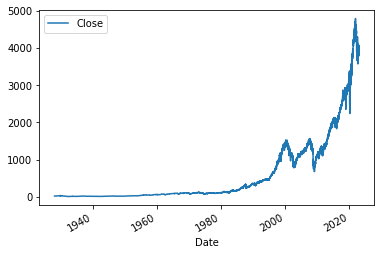

In [ ]:
sp500.plot.line(y="Close", use_index=True)

In [ ]:
# Data cleaning and preprocessing
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
# Setting up our target. Our target is will stock tomorrow go up or down
# Shift one row backward
sp500["Tomorrow"]= sp500["Close"].shift(-1)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-01-23 00:00:00-05:00,3978.139893,4039.310059,3971.639893,4019.810059,3945210000,4016.949951
2023-01-24 00:00:00-05:00,4001.739990,4023.919922,3989.790039,4016.949951,3320430000,4016.219971
2023-01-25 00:00:00-05:00,3982.709961,4019.550049,3949.060059,4016.219971,3724020000,4060.429932


In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-01-23 00:00:00-05:00,3978.139893,4039.310059,3971.639893,4019.810059,3945210000,4016.949951,0
2023-01-24 00:00:00-05:00,4001.739990,4023.919922,3989.790039,4016.949951,3320430000,4016.219971,0
2023-01-25 00:00:00-05:00,3982.709961,4019.550049,3949.060059,4016.219971,3724020000,4060.429932,1


In [ ]:
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-01-23 00:00:00-05:00,3978.139893,4039.310059,3971.639893,4019.810059,3945210000,4016.949951,0
2023-01-24 00:00:00-05:00,4001.739990,4023.919922,3989.790039,4016.949951,3320430000,4016.219971,0
2023-01-25 00:00:00-05:00,3982.709961,4019.550049,3949.060059,4016.219971,3724020000,4060.429932,1


In [ ]:
# Training an initial machine learning model
from sklearn.ensemble import RandomForestClassifier

# "n_estimators=100" times random forest apne aap ko train kare.
# "random_state = 1" because we don't want to randomized the data. Simple, we get same result if we run twice the code.
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split = 100, random_state=1)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [ ]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [ ]:
# The answer is in percentage.
precision_score(test["Target"], preds)

0.3333333333333333

In [ ]:
# Combine actual values with the predicted values.
combined = pd.concat([test["Target"], preds], axis=1)

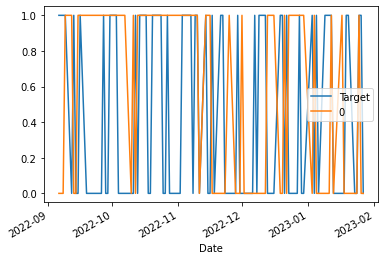

In [ ]:
# Here Orange lines are predictions a model made and blue lines are what actually happen.
combined.plot();

In [ ]:
# Build a backtesting System
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
# Here 250 is working days in a year and, 2500 means data of 10 years.
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions['Predictions'].value_counts()

0    3395
1    2438
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.527481542247744

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534031
0    0.465969
Name: Target, dtype: float64

In [50]:
# Adding additional predictors to our model.
# Last 2 dayes, 5 days, quarter, last year, and last 4 years
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [51]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23 00:00:00-05:00,3978.139893,4039.310059,3971.639893,4019.810059,3945210000,4016.949951,0,1.005906,2.0,1.014535,2.0,1.027240,26.0,0.990896,111.0,1.100897,538.0
2023-01-24 00:00:00-05:00,4001.739990,4023.919922,3989.790039,4016.949951,3320430000,4016.219971,0,0.999644,1.0,1.012485,2.0,1.025695,26.0,0.990522,111.0,1.099724,537.0
2023-01-25 00:00:00-05:00,3982.709961,4019.550049,3949.060059,4016.219971,3724020000,4060.429932,1,0.999909,0.0,1.007863,2.0,1.024598,26.0,0.990669,111.0,1.099140,536.0


In [53]:
sp500 = sp500.dropna()

In [54]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-20 00:00:00-05:00,3909.040039,3972.959961,3897.860107,3972.610107,4013360000,4019.810059,1,1.009371,1.0,1.003672,2.0,1.015874,26.0,0.978884,111.0,1.088361,538.0
2023-01-23 00:00:00-05:00,3978.139893,4039.310059,3971.639893,4019.810059,3945210000,4016.949951,0,1.005906,2.0,1.014535,2.0,1.027240,26.0,0.990896,111.0,1.100897,538.0
2023-01-24 00:00:00-05:00,4001.739990,4023.919922,3989.790039,4016.949951,3320430000,4016.219971,0,0.999644,1.0,1.012485,2.0,1.025695,26.0,0.990522,111.0,1.099724,537.0


In [55]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [56]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [58]:
predictions["Predictions"].value_counts()

0    3395
1    2438
Name: Predictions, dtype: int64

In [60]:
precision_score(predictions["Target"], predictions["Predictions"])

0.527481542247744